# S05 T01: Transformació Registre Log amb Regular expressions

## Exercici 1
## Estandaritza, identifica i enumera cada un dels atributs / variables de l'estructura de l'arxiu "Web_access_log-akumenius.com" que trobaràs al repositori de GitHub "Data-sources".

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPy import IP
from user_agents import parse
import requests
import json
from ip2geotools.databases.noncommercial import DbIpCity
import geopandas as gpd
import descartes

In [2]:
# leer el archivo txt
logdoc = pd.read_csv("Data-sources\Web_access_log-akumenius.com.txt", header=None, error_bad_lines=False, warn_bad_lines=False,
                     engine="python", sep = ' ')
logdoc.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
1,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
2,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
3,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
4,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
5,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
6,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
7,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
8,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
9,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-


In [3]:
logdoc.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [4]:
logdoc.columns=["host","ip","borrar1", "borrar2","date","zone","request","status","borrar3","borrar4","user_agent", "log"]  
#ponemos nombres a las columnas
logdoc.columns

Index(['host', 'ip', 'borrar1', 'borrar2', 'date', 'zone', 'request', 'status',
       'borrar3', 'borrar4', 'user_agent', 'log'],
      dtype='object')

In [5]:
logdoc.head()

,host,ip,borrar1,borrar2,date,zone,request,status,borrar3,borrar4,user_agent,log
0,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
1,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
2,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
3,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
4,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-


In [6]:
logdoc.borrar3.unique() 
# la columna borrar3 contiene datos que por ahora conservaré

array(['-', '3100', '8811', ..., '18227', '39333', '19052'], dtype=object)

In [7]:
#limpiar las columnas que están vacías, 2 y 3 y 9
log = logdoc.drop (["borrar1", "borrar2", "borrar4"], axis=1)
log.tail()

,host,ip,date,zone,request,status,borrar3,user_agent,log
261866,www.akumenius.com,5.255.253.53,[02/Mar/2014:03:05:39,+0100],GET / HTTP/1.1,200,7528,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...,VLOG=-
261867,www.akumenius.com,74.86.158.107,[02/Mar/2014:03:09:52,+0100],HEAD / HTTP/1.1,200,-,Mozilla/5.0+(compatible; UptimeRobot/2.0; http...,VLOG=-
261868,localhost,127.0.0.1,[02/Mar/2014:03:10:18,+0100],OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-
261869,localhost,127.0.0.1,[02/Mar/2014:03:10:18,+0100],OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-
261870,localhost,127.0.0.1,[02/Mar/2014:03:10:18,+0100],OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-


In [8]:
# eliminamos los [] de las columnas date y zone

log['date'] = log.date.str.replace(r'[', '',regex=True)
log['zone'] = log.zone.str.replace(r']', '',regex=True)
log.head()

,host,ip,date,zone,request,status,borrar3,user_agent,log
0,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-
1,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-
2,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-
3,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-
4,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-


In [9]:
log.shape

(261871, 9)

### HOST
#### Identificamos cuatro host de akumenicus y un local host.

In [10]:
log.host.unique()

array(['localhost', 'www.akumenius.com', 'akumenius.com', 'akumenius.es',
       'test.akumenius.com'], dtype=object)

In [11]:
log.host.value_counts()


www.akumenius.com     232298
test.akumenius.com     14610
localhost              14127
akumenius.com            742
akumenius.es              94
Name: host, dtype: int64

In [12]:
log.describe().round (2)

,status
count,261871.00
mean,217.40
std,46.99
min,200.00
25%,200.00
50%,200.00
75%,200.00
max,502.00


### IP
#### IP (Internet Protocol) del usuario

In [13]:
log.ip.unique()

array(['127.0.0.1', '66.249.76.216', '5.255.253.53', ...,
       '217.174.248.179', '188.135.173.80', '206.198.5.33'], dtype=object)

### Status
#### Los  códigos de estado de respuesta HTTP indican si se ha completado satisfactoriamente una solicitud HTTP específica. Las respuestas se agrupan en cinco clases:

- Respuestas informativas (100–199),
- Respuestas satisfactorias (200–299),
- Redirecciones (300–399),
- Errores de los clientes (400–499),
- y errores de los servidores (500–599).

#### Encontrado en: https://developer.mozilla.org/es/docs/Web/HTTP/Status

#### la mayoría de las búsquedas se han tenido respuesta satisfactoria o bien se han redireccionado

In [14]:
log.status.value_counts()

200    226380
304     25269
404      8630
301       870
206       304
403       194
302       109
502        44
408        37
400        26
401         5
500         3
Name: status, dtype: int64

### ZONE

In [15]:
log.zone.value_counts()

+0100    261871
Name: zone, dtype: int64

### Request

In [16]:
log.request.unique()

array(['OPTIONS * HTTP/1.0',
       'GET /hoteles-baratos/ofertas-hotel-Club-&-Hotel-Letoonia--en-Fethiye-8460b-destinos.html HTTP/1.1',
       'GET /hoteles-baratos/ofertas-hotel-Metropolis-Hotel-en-Kaunas-210244b-destinos.html HTTP/1.1',
       ...,
       'GET /destinosCaracteristicas/hoteles-baratos-en-Milan_ITALIA-con-Lavander%C3%83%C2%ADa HTTP/1.1',
       'GET /escapadas/escapada-especial-carnaval-hotel-intur-orange-9d6bb97f63e2ccde99d568a822c355fc.html HTTP/1.1',
       'GET /destinos-caracteristicas/hoteles-baratos-en-Baiona_ESPA%C3%91A-con-Desayuno-continental HTTP/1.1'],
      dtype=object)

###  User agent
#### Information about Device, Device Model, Operating System, Agent Type, Browser, Rendering Engine.
http://my-user-agent.com/ 

In [17]:
# Request se puede separar para identificar las partes
log.log.unique()

array(['VLOG=-'], dtype=object)

## Exercici 2
#### Neteja, preprocesa, estructura i transforma (dataframe) les dades del registre d'Accés a la web.

In [18]:
# modificamos el formato de la columna date a un formato objetct tipo datetime64
log["date2"] =pd.to_datetime(log["date"], format="%d/%b/%Y:%H:%M:%S")
log.head() 

,host,ip,date,zone,request,status,borrar3,user_agent,log,date2
0,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-,2014-02-23 03:10:31
1,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-,2014-02-23 03:10:31
2,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-,2014-02-23 03:10:31
3,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-,2014-02-23 03:10:31
4,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-,2014-02-23 03:10:31


In [19]:
# eliminamos la columan date
log.drop(["date"], inplace=True, axis=1)
log.head()

,host,ip,zone,request,status,borrar3,user_agent,log,date2
0,localhost,127.0.0.1,+0100,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-,2014-02-23 03:10:31
1,localhost,127.0.0.1,+0100,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-,2014-02-23 03:10:31
2,localhost,127.0.0.1,+0100,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-,2014-02-23 03:10:31
3,localhost,127.0.0.1,+0100,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-,2014-02-23 03:10:31
4,localhost,127.0.0.1,+0100,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-,2014-02-23 03:10:31


In [20]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261871 entries, 0 to 261870
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   host        261871 non-null  object        
 1   ip          261871 non-null  object        
 2   zone        261871 non-null  object        
 3   request     261871 non-null  object        
 4   status      261871 non-null  int64         
 5   borrar3     261871 non-null  object        
 6   user_agent  261871 non-null  object        
 7   log         261871 non-null  object        
 8   date2       261871 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 18.0+ MB


In [21]:
# Desagregamos los componentes de user_agent en tres columnas separadas
log['browser'] = log['user_agent'].map(lambda x : parse(x).browser.family)
log['os'] = log['user_agent'].map(lambda x : parse(x).os.family)
log['device'] = log['user_agent'].map(lambda x : parse(x).device.family)
log.tail()

,host,ip,zone,request,status,borrar3,user_agent,log,date2,browser,os,device
261866,www.akumenius.com,5.255.253.53,+0100,GET / HTTP/1.1,200,7528,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...,VLOG=-,2014-03-02 03:05:39,YandexBot,Other,Spider
261867,www.akumenius.com,74.86.158.107,+0100,HEAD / HTTP/1.1,200,-,Mozilla/5.0+(compatible; UptimeRobot/2.0; http...,VLOG=-,2014-03-02 03:09:52,UptimeRobot,Other,Spider
261868,localhost,127.0.0.1,+0100,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-,2014-03-02 03:10:18,Other,Other,Other
261869,localhost,127.0.0.1,+0100,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-,2014-03-02 03:10:18,Other,Other,Other
261870,localhost,127.0.0.1,+0100,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-,2014-03-02 03:10:18,Other,Other,Other


In [22]:
log.browser.unique()

array(['Other', 'Googlebot', 'YandexBot', 'bingbot', 'Firefox',
       'AhrefsBot', 'Baiduspider', 'UptimeRobot', 'msnbot-media',
       'BingPreview', 'Wget', 'ia_archiver', 'spbot', 'Opera', 'IE',
       'Chrome', 'Googlebot-Mobile', 'Mobile Safari', 'Googlebot-Image',
       'MJ12bot', 'Android', 'Google', 'Sogou web spider', 'YandexImages',
       'Chrome Mobile', 'FacebookBot', 'Java', 'msnbot', 'Thunderbird',
       'Baiduspider-image', 'BLEXBot', 'BlackBerry WebKit', 'curl',
       'favicon', 'EasouSpider', 'MobileSafari', 'Chrome Mobile iOS',
       'Mobile Safari UI/WKWebView', 'Safari', 'CareerBot',
       'Firefox Mobile', 'URLAppendBot', 'Exabot', 'socialbm_bot',
       'Chrome Frame', 'Mercury', 'GmailImageProxy', 'Genieo',
       'Chrome Mobile WebView', 'Maxthon', 'Outlook', 'SISTRIX Crawler',
       'Crawler', 'Chromium', 'UC Browser', 'archive.org_bot',
       'Opera Mini', 'AdsBot-Google', 'Xenu Link Sleuth', 'SeznamBot',
       'IE Mobile', 'Twitterbot', 'Yahoo! Slur

In [23]:
log.os.unique()  # los sistemas operativos que se extrae del df

array(['Other', 'Linux', 'Windows', 'iOS', 'Mac OS X', 'Android',
       'BlackBerry OS', 'Ubuntu', 'Fedora', 'Windows Phone', 'Red Hat'],
      dtype=object)

In [24]:
# Trabajar con la columna IP
# identificamos tipos de IP
log["type"] = log["ip"].apply(lambda x: IP(x).iptype())
log["type"].value_counts()

PUBLIC      247979
LOOPBACK     13892
Name: type, dtype: int64

In [25]:
# 127.0.0.1 es el localhost, no lo utilizamos para el analisis
# nos quedamos con Public host
log_selection = log[log["type"]=="PUBLIC"]
log_selection.head()

,host,ip,zone,request,status,borrar3,user_agent,log,date2,browser,os,device,type
22,www.akumenius.com,66.249.76.216,+0100,GET /hoteles-baratos/ofertas-hotel-Club-&-Hote...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,VLOG=-,2014-02-23 03:10:31,Googlebot,Other,Spider,PUBLIC
23,www.akumenius.com,66.249.76.216,+0100,GET /hoteles-baratos/ofertas-hotel-Metropolis-...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,VLOG=-,2014-02-23 03:10:33,Googlebot,Other,Spider,PUBLIC
24,www.akumenius.com,66.249.76.216,+0100,GET /hoteles-baratos/ofertas-hotel-Faena-Hotel...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,VLOG=-,2014-02-23 03:10:35,Googlebot,Other,Spider,PUBLIC
25,www.akumenius.com,66.249.76.216,+0100,GET /hoteles-baratos/ofertas-hotel-Kensington-...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,VLOG=-,2014-02-23 03:10:38,Googlebot,Other,Spider,PUBLIC
26,www.akumenius.com,66.249.76.216,+0100,GET /destinos-baratos/destinosEstrelles/hotele...,200,8811,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,VLOG=-,2014-02-23 03:10:39,Googlebot,Other,Spider,PUBLIC


In [26]:
#seleccionamos la columna ip
ip_selection = log_selection.iloc[:,[1]] 
ip_selection.tail()

,ip
261863,5.255.253.53
261864,5.255.253.53
261865,5.255.253.53
261866,5.255.253.53
261867,74.86.158.107


In [27]:
ip_selection.shape

(247979, 1)

## Primer intento


In [28]:
ip_selection

,ip
22,66.249.76.216
23,66.249.76.216
24,66.249.76.216
25,66.249.76.216
26,66.249.76.216
...,...
261863,5.255.253.53
261864,5.255.253.53
261865,5.255.253.53
261866,5.255.253.53


In [29]:
# existen ip repetidas dentro de la tabla
# hacemos una tabla solo con las ip sin repetición (unique)
data = {"ip": ip_selection.ip.unique()} 
#load data into a DataFrame object:
ip_selectionok = pd.DataFrame(data)
ip_selectionok 
# nuestra selección ha bajado de 247979 a 2920 ip con valores únicos
# usaremos esta selección para la geolocalización ya que los intentos con un df más grande no termina de dar resultados

,ip
0,66.249.76.216
1,5.255.253.53
2,157.55.35.112
3,193.111.141.116
4,5.10.83.71
...,...
2915,46.222.83.180
2916,79.155.78.117
2917,217.174.248.179
2918,188.135.173.80


In [30]:
# definimos los parámetros que queremos importar
parametros = 'lat,lon,country,city'
data = {"fields":parametros}

def geolocate(ip):
     
    ip_address = ip

    # URL to send the request to
    request_url = "http://ip-api.com/json/" + ip
    # Send request and decode the result
    response = requests.get(request_url)
    try:    
        result = response.content.decode()

        # Convert this data into a dictionary
        result  = json.loads(result)
    except:
        result = "Error"
    return(result)

In [31]:
ip_selectionok.ip[2915]

'46.222.83.180'

In [32]:
# pasamos el row para que identifique el ip
test_ip1 = str(ip_selection.ip[2915])
test_ip1

'157.55.33.97'

In [33]:
# geolocalizamos el test_ip
geoip1=geolocate(test_ip1)
geoip1

{'status': 'success',
 'country': 'United States',
 'countryCode': 'US',
 'region': 'NJ',
 'regionName': 'New Jersey',
 'city': 'Newark',
 'zip': '07175',
 'lat': 40.7357,
 'lon': -74.1724,
 'timezone': 'America/New_York',
 'isp': 'Microsoft Corporation',
 'org': 'Microsoft Corporation',
 'as': 'AS8075 Microsoft Corporation',
 'query': '157.55.33.97'}

In [34]:
ip_mini = ip_selectionok[0:101]
ip_mini.head()

,ip
0,66.249.76.216
1,5.255.253.53
2,157.55.35.112
3,193.111.141.116
4,5.10.83.71


In [35]:
ip_mini["geolocation"] = ip_mini.apply(lambda x: geolocate(x['ip']),axis=1)
ip_mini.head()

<ipython-input-35-87ff37119e6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ip_mini["geolocation"] = ip_mini.apply(lambda x: geolocate(x['ip']),axis=1)


,ip,geolocation
0,66.249.76.216,"{'status': 'success', 'country': 'United State..."
1,5.255.253.53,"{'status': 'success', 'country': 'Russia', 'co..."
2,157.55.35.112,"{'status': 'success', 'country': 'United State..."
3,193.111.141.116,"{'status': 'success', 'country': 'Germany', 'c..."
4,5.10.83.71,"{'status': 'success', 'country': 'Netherlands'..."


In [36]:
ip_mini.dtypes

ip             object
geolocation    object
dtype: object

In [37]:
df = pd.DataFrame(ip_mini)
df.head(11)

,ip,geolocation
0,66.249.76.216,"{'status': 'success', 'country': 'United State..."
1,5.255.253.53,"{'status': 'success', 'country': 'Russia', 'co..."
2,157.55.35.112,"{'status': 'success', 'country': 'United State..."
3,193.111.141.116,"{'status': 'success', 'country': 'Germany', 'c..."
4,5.10.83.71,"{'status': 'success', 'country': 'Netherlands'..."
5,180.76.5.223,"{'status': 'success', 'country': 'China', 'cou..."
6,180.76.6.148,"{'status': 'success', 'country': 'China', 'cou..."
7,180.76.5.188,"{'status': 'success', 'country': 'China', 'cou..."
8,180.76.6.135,"{'status': 'success', 'country': 'China', 'cou..."
9,180.76.6.44,"{'status': 'success', 'country': 'China', 'cou..."


In [52]:
# expandir la columna geolocation
df_final = pd.concat([df, df['geolocation'].apply(pd.Series)], axis = 1).drop('geolocation', axis = 1)
df_final.head()

,ip,0,as,city,country,countryCode,isp,lat,lon,org,query,region,regionName,status,timezone,zip
0,66.249.76.216,NaN,AS15169 Google LLC,Mountain View,United States,US,Google LLC,37.4220,-122.0840,Google LLC,66.249.76.216,CA,California,success,America/Los_Angeles,94043
1,5.255.253.53,NaN,AS208722 Yandex Oy,Moscow,Russia,RU,Yandex enterprise network,55.7483,37.6171,Yandex LLC,5.255.253.53,MOW,Moscow,success,Europe/Moscow,127616
2,157.55.35.112,NaN,AS8075 Microsoft Corporation,Newark,United States,US,Microsoft Corporation,40.7357,-74.1724,Microsoft Corporation,157.55.35.112,NJ,New Jersey,success,America/New_York,07175
3,193.111.141.116,NaN,,Düsseldorf,Germany,DE,Ripe NCC,51.2705,6.8144,Ripe NCC,193.111.141.116,NW,North Rhine-Westphalia,success,Europe/Berlin,40472
4,5.10.83.71,NaN,AS36351 SoftLayer Technologies Inc.,Amsterdam,Netherlands,NL,SoftLayer,52.3759,4.8975,Cognizant Technology Solutions - Demo Account,5.10.83.71,NH,North Holland,success,Europe/Amsterdam,1012


In [39]:
df_final.country.unique ()  # En nuestro df reducido, se ha podido identificar 7 ubicaciones y una sin identificar

array(['United States', 'Russia', 'Germany', 'Netherlands', 'China',
       'Spain', 'France', nan], dtype=object)

## Exercici 3
### Mostra'm la teva creativitat, Sorprèn-me fes un pas més enllà amb l'anàlisi anterior.

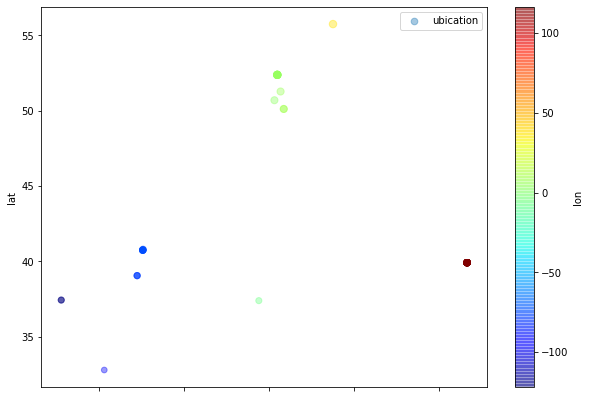

In [41]:
df_final.plot(kind="scatter", x="lon", y="lat",
    s = df_final['lat'], label="ubication",
    c = "lon", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

In [96]:
# pasamos los gráficos a geopandas
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df_final['lon'].astype('float32'), df_final['lat'].astype('float32')))

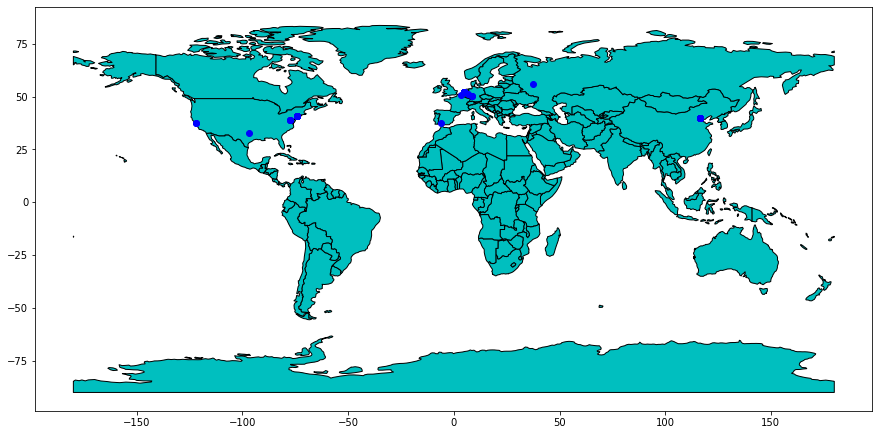

In [103]:
ax = world[['continent', 'geometry']].plot(
    color='c', edgecolor='black', figsize=(15,15))
gdf.plot(ax=ax, color='blue')

plt.show()